<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

# 과제: 고객 신용도 예측


<img src = "https://github.com/Jangrae/img/blob/master/credit-card.jpg?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 코드 셀에는 주석을 충분히 답니다.
- 마크다운 셀을 사용해 작업 한 내용을 충분히 설명합니다.
- 입력을 요구한 (의견) 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 다양한 방법으로 데이터를 탐색하고 결과를 정리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.
- 더 나은 성능을 보이도록 특정 모델을 튜닝합니다.

**3) 데이터 정보**

<img src = "https://github.com/Jangrae/img/blob/master/credit.png?raw=true" width=550 align="left"/>

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/credit_NA.csv'
path = 'https://bit.ly/CreditFile'
data = pd.read_csv(path)

# 2.데이터 이해

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

## 2.1.기본 정보 확인

- 데이터에 대한 기본 정보를 우선 확인합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [3]:
# 상위 데이터 확인
data.head()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28.0,2,1,3,1,1
1,1,2,9,2,0,276,3,4,4,1,22.0,1,1,2,1,1
2,1,1,18,4,2,1049,2,2,4,2,21.0,1,1,3,1,1
3,1,1,24,4,1,6419,5,2,4,4,NaN,3,2,4,2,1
4,1,3,12,2,2,1424,5,2,4,1,55.0,2,1,4,2,1


In [4]:
# 하위 데이터 확인
data.tail()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
995,1,1,12,2,3,1680,5,4,1,1,35.0,2,1,3,1,1
996,1,1,42,2,2,7882,4,3,4,2,45.0,3,1,3,1,1
997,0,2,54,0,9,15945,2,3,4,4,58.0,1,1,3,2,1
998,1,2,15,4,3,1537,5,3,4,1,50.0,2,2,3,2,1
999,0,3,12,2,0,1386,3,2,2,2,26.0,2,1,3,1,1


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [5]:
# 변수 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Creditability   1000 non-null   int64  
 1   AccountBalance  1000 non-null   int64  
 2   CreditDuration  1000 non-null   int64  
 3   Payment         1000 non-null   int64  
 4   Purpose         1000 non-null   int64  
 5   CreditAmount    1000 non-null   int64  
 6   Employment      1000 non-null   int64  
 7   SexMarital      1000 non-null   int64  
 8   CurrentAddress  1000 non-null   int64  
 9   MostValuable    1000 non-null   int64  
 10  Age             983 non-null    float64
 11  ApartmentType   1000 non-null   int64  
 12  NoCredits       1000 non-null   int64  
 13  Occupation      1000 non-null   int64  
 14  Telephone       1000 non-null   int64  
 15  ForeignWorker   1000 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 125.1 KB


**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [6]:
# 기초통계정보 확인
data.describe()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,983.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.54500,2.828000,3271.24800,3.384000,2.68200,2.845000,2.358000,35.495422,1.928000,1.407000,2.904000,1.404000,1.037000
std,0.458487,0.835589,12.058814,1.08312,2.744439,2822.75176,1.208306,0.70808,1.103718,1.050209,11.302980,0.530186,0.577654,0.653614,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,3.000000,2.00000,2.000000,1.000000,27.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,3.000000,3.00000,3.000000,2.000000,33.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,4.00000,3.000000,3972.25000,5.000000,3.00000,4.000000,3.000000,42.000000,2.000000,2.000000,3.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,4.00000,4.000000,4.000000,75.000000,3.000000,4.000000,4.000000,2.000000,2.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [7]:
# 결측치 확인
data.isna().sum()

Creditability      0
AccountBalance     0
CreditDuration     0
Payment            0
Purpose            0
CreditAmount       0
Employment         0
SexMarital         0
CurrentAddress     0
MostValuable       0
Age               17
ApartmentType      0
NoCredits          0
Occupation         0
Telephone          0
ForeignWorker      0
dtype: int64

## 2.2.데이터 상세 확인(5가지 이상 추가)

- 데이터를 **충분히 이해할 수 있도록** 집계와 시각화를 통해 살펴봅니다.
- 이후 모델링을 진행해야 하니 분석에 너무 많은 시간을 할애해서는 안됩니다.
- 분석 결과를 관련 코드 셀 아래에 정리합니다.

**1) Target 값 분포 확인**

- Target 변수인 Creditability 변수의 값 분포를 확인합니다.

In [8]:
# 범주값별 개수 확인
target = 'Creditability'
print(data[target].value_counts())

1    700
0    300
Name: Creditability, dtype: int64


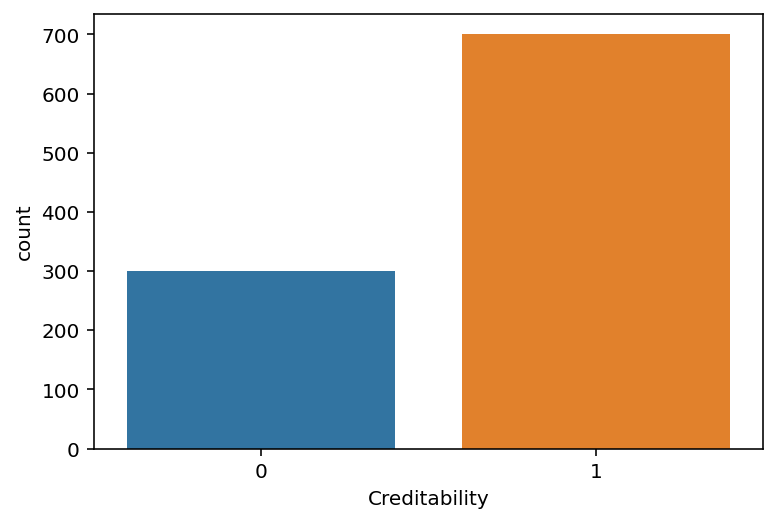

In [9]:
# Creditability 값의 분포 시각화
sns.countplot(x=target, data=data)
plt.show()

- 데이터의 불균형이 있다.
- 변수와 신용도 간 상관관계 분석 필요

**2) 변수 구분**

- Target 변수(Creditability)를 제외한 변수를 범주형과 연속형으로 구분해 목륵을 정리합니다.
- 목록 개수는 필요한 만큼 늘려 사용합니다.

- 범주형 변수 (가변수화 대상)
    - AccountBalance
    - Purpose 
    - Employment  
    - SexMarital  
    - CurrentAddress
    - Payment
    - MostValuable
    - ApartmentType
    - NoCredits
    - Occupation
    - Telephone
    - ForeignWorker

- 연속형 변수 (정규화 대상)
    - CreditDuration
    - CreditAmount
    - Age

**3) 범주형 변수 확인**

- Target 변수(Creditability)를 제외한 범주형 변수의 범주값과 그 값의 개수를 확인합니다.
- 참고: 대상 변수를 리스트로 선언하고 반복문을 수행해 확인하면 편리합니다.

In [10]:
# 연속형 변수 리스트 선언
n_features = [target, 'CreditDuration', 'CreditAmount', 'Age']

# 범주형 변수 리스트 선언
c_features = [f for f in list(data) if f not in n_features]

# 범주형 변수별 범주값과 그 값의 개수 확인
for c_f in c_features:
    print(data[c_f].value_counts())
    print('-' * 50)

3    457
1    274
2    269
Name: AccountBalance, dtype: int64
--------------------------------------------------
2    530
4    293
3     88
1     49
0     40
Name: Payment, dtype: int64
--------------------------------------------------
3     280
0     234
2     181
1     103
9      97
6      50
5      22
4      12
10     12
8       9
Name: Purpose, dtype: int64
--------------------------------------------------
3    339
5    253
4    174
2    172
1     62
Name: Employment, dtype: int64
--------------------------------------------------
3    548
2    310
4     92
1     50
Name: SexMarital, dtype: int64
--------------------------------------------------
4    413
2    308
3    149
1    130
Name: CurrentAddress, dtype: int64
--------------------------------------------------
3    332
1    282
2    232
4    154
Name: MostValuable, dtype: int64
--------------------------------------------------
2    714
1    179
3    107
Name: ApartmentType, dtype: int64
------------------------------------

**4) Payment**

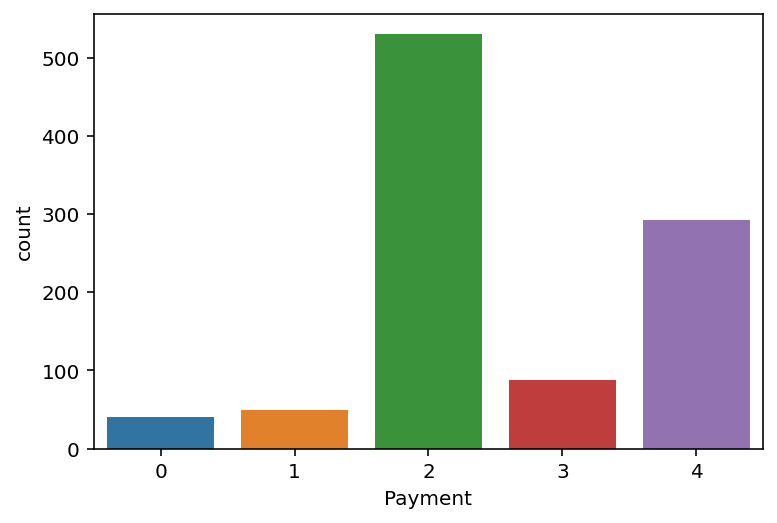

In [11]:
feature = 'Payment'
sns.countplot(data[feature])
plt.show()

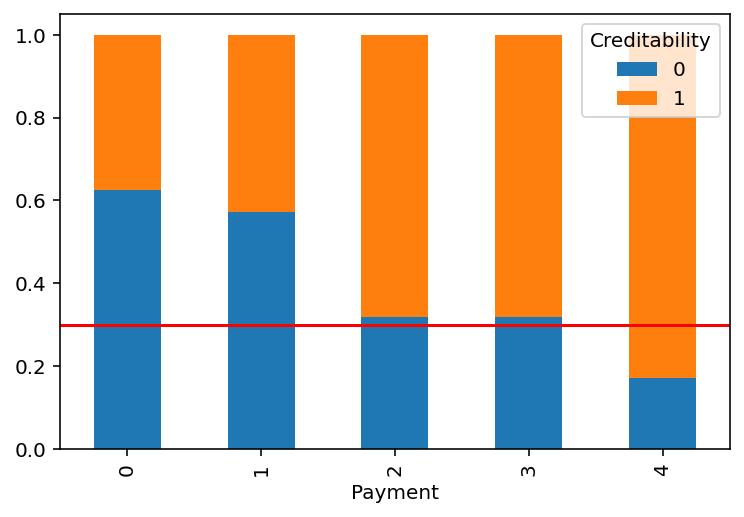

In [12]:
# Payment --> Credibility 값 분포
feature = 'Payment'

# 집계
temp = pd.crosstab(data[feature], data[target], normalize = 'index')

# 시각화
temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

- 연체되었거나, 잔여 대출금이 있는 경우 신용도가 낮은 고객들의 비율이 평균보다 높다.
- 대출금을 완납한 경우 신용도가 높은 고객들의 비율이 평균보다 높다.

**5) AccountBalance**

- Credibility 변수 값으로 구분해 AccountBalance 변수 값의 분포를 stacked bar로 확인

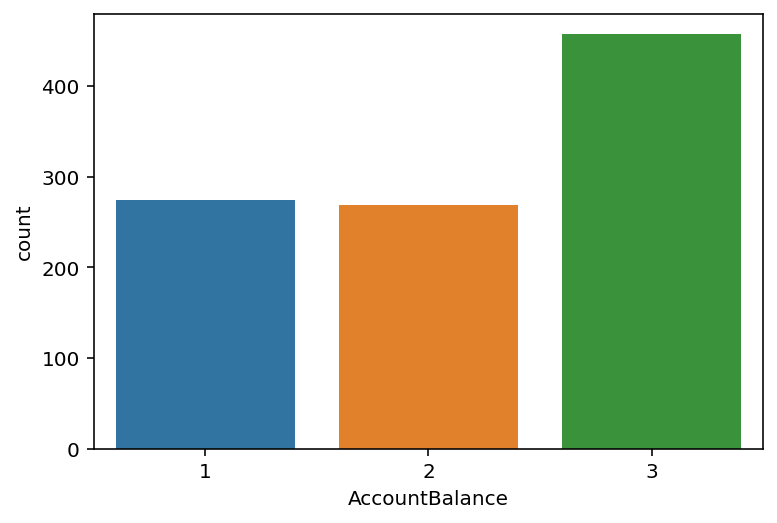

In [13]:
feature = 'AccountBalance'
sns.countplot(data[feature])
plt.show()

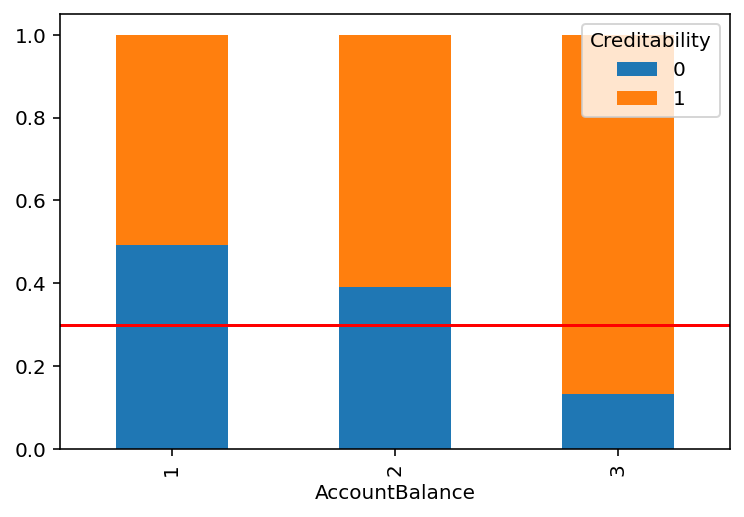

In [14]:
# AccountBalance --> Credibility 값 분포
feature = 'AccountBalance'

# 집계
temp = pd.crosstab(data[feature], data[target], normalize = 'index')

# 시각화
temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

- 계좌를 개설하지 않았거나 잔금이 없는 경우 신용도가 낮은 고객의 비율이 평균보다 높다.
- 잔금이 있는 경우 신용도가 높은 고객의 비율이 평균보다 높다.

**6) ApartmentType**

- Credibility 변수 값으로 구분해 ApartmentType 변수 값의 분포를 stacked bar로 확인

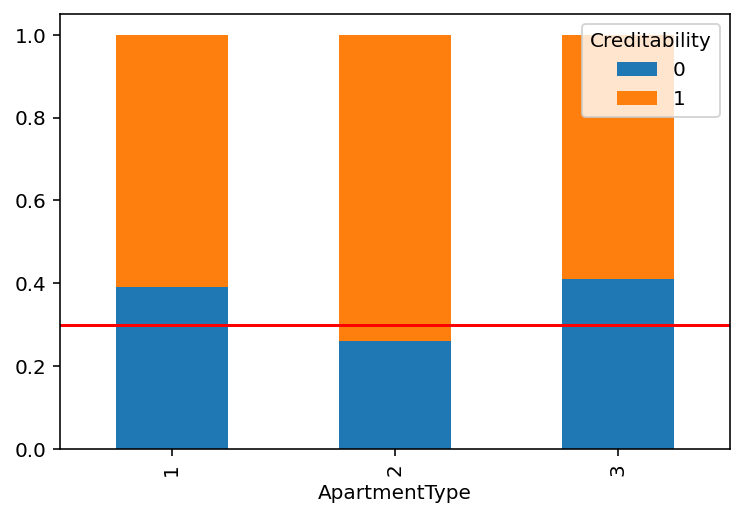

In [15]:
# ApartmentType --> Credibility 값 분포
feature = 'ApartmentType'

# 집계
temp = pd.crosstab(data[feature], data[target], normalize = 'index')

# 시각화
temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

- 임대 주택에 거주하는 경우 신용도가 높은 고객들의 비율이 평균보다 높다.
- 주거 환경과 신용도 간의 약한 상관관계가 있는 것으로 보인다.

**7) CreditAmount**

- Credibility 변수 값으로 구분해 CreditAmount 변수 값의 분포를 histogram으로 확인

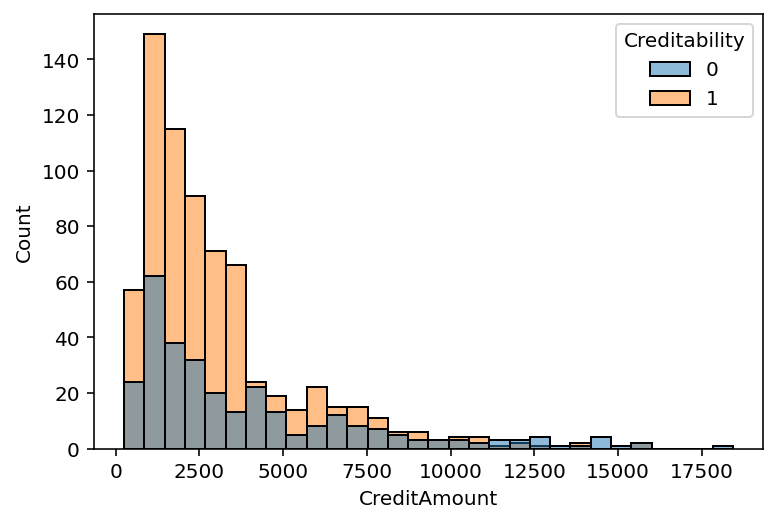

In [16]:
# CreditAmount --> Credibility 값 분포
sns.histplot(x=data['CreditAmount'], hue=data[target], bins=30)
plt.show()

- 약 10000달러를 기준으로 분포가 나뉜다.
- 대출금액이 낮을 수록 신용도가 높은 고객들의 비율이 높아지는 경향이 있다.

**8) CreditDuration**

- Credibility 변수 값으로 구분해 CreditDuration 변수 값의 분포를 histogram으로 확인

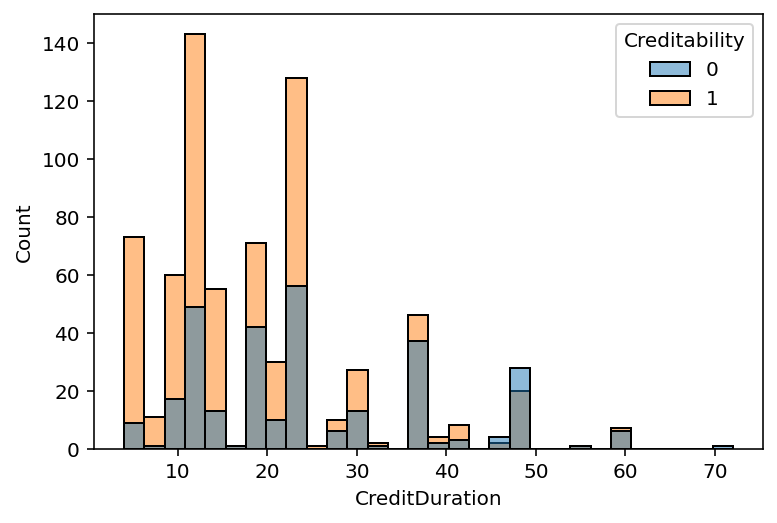

In [17]:
# CreditDuration --> Credibility 값 분포
sns.histplot(x=data['CreditDuration'], hue=data[target], bins=30)
plt.show()

- 약 50개월을 기준으로 분포가 나뉜다.
- 신청한 대출기간이 30개월 이상인 경우 신용도가 낮은 고객들의 비율이 높아지는 경향이 있다.

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 결측치 처리**

- Age 변수에 대한 결측치 처리를 진행합니다.
- 데이터 양이 많지 않으니 제거 보다는 채우기를 권고합니다.

In [18]:
# 평균값으로 채우기
age_mean = data['Age'].mean()
data['Age'].fillna(age_mean, inplace=True)
print(data.isna().sum())

Creditability     0
AccountBalance    0
CreditDuration    0
Payment           0
Purpose           0
CreditAmount      0
Employment        0
SexMarital        0
CurrentAddress    0
MostValuable      0
Age               0
ApartmentType     0
NoCredits         0
Occupation        0
Telephone         0
ForeignWorker     0
dtype: int64


**2) x, y 분리**

- Target을 선정하고 x, y를 분리합니다.

In [19]:
target = 'Creditability'

# x, y 분리
x = data.drop(target, axis=1)
y = data[target]

**3) 가변수화**

- 앞에서 범주형으로 구분한 변수에 대해 가변수화를 수행합니다.
- 참고: 이미 x, y로 분리가 되었으니 x에 대한 가변수화를 수행해야 합니다.


In [20]:
# 가변수화
x = pd.get_dummies(x, columns=c_features, drop_first=True)

# 확인
print(data.head())
print(data.info())

   Creditability  AccountBalance  CreditDuration  Payment  Purpose  \
0              1               3              24        2        0   
1              1               2               9        2        0   
2              1               1              18        4        2   
3              1               1              24        4        1   
4              1               3              12        2        2   

   CreditAmount  Employment  SexMarital  CurrentAddress  MostValuable  \
0          1249           2           4               2             1   
1           276           3           4               4             1   
2          1049           2           2               4             2   
3          6419           5           2               4             4   
4          1424           5           2               4             1   

         Age  ApartmentType  NoCredits  Occupation  Telephone  ForeignWorker  
0  28.000000              2          1           3          1

**4) 정규화**

- 앞에서 연속형으로 구분한 변수에 대해 정규화를 진행합니다.

In [21]:
# 정규화
n_features.remove('Creditability')
x[n_features] = (x[n_features] - x[n_features].min()) / (x[n_features].max() - x[n_features].min())

# 확인
x

,CreditDuration,CreditAmount,Age,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Payment_4,Purpose_1,...,ApartmentType_2,ApartmentType_3,NoCredits_2,NoCredits_3,NoCredits_4,Occupation_2,Occupation_3,Occupation_4,Telephone_2,ForeignWorker_2
0,0.294118,0.054969,0.160714,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.073529,0.001431,0.053571,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.205882,0.043964,0.035714,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.294118,0.339441,0.294561,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,1,1,0
4,0.117647,0.064598,0.642857,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.117647,0.078684,0.285714,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
996,0.558824,0.419941,0.464286,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
997,0.735294,0.863596,0.696429,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
998,0.161765,0.070815,0.553571,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0


**5) 학습용, 평가용 데이터 분리**


- 모델링을 위해 학습용, 평가용 데이터를 분리합니다.

In [22]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 다음 알고리즘을 사용해 모델링을 진행합니다.
    - Logistic Regression
    - KNN
    - Decision Tree
    - Random Forest
    - XGBoost
- Classification Report를 사용해 성능을 평가합니다.
- 성능 평가 결과 아래에 성능에 대한 의견을 정리합니다.
- 혼동행렬, 변수 중요도 등을 시각화해 모델을 심도있게 탐색합니다.

## 4.1.Logistic Regression

### 4.1.1.모델링

- Logistic Regression 알고리즘을 사용해 모델링을 진행합니다.

In [23]:
# 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
# 선언하기
model = LogisticRegression()

In [25]:
# 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
# 예측하기
y_pred = model.predict(x_test)

In [27]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 48  49]
 [ 31 172]]
              precision    recall  f1-score   support

           0       0.61      0.49      0.55        97
           1       0.78      0.85      0.81       203

    accuracy                           0.73       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.72      0.73      0.73       300



- 로지스틱 회귀모델의 정확도는 0.73
- 신용도가 낮은 고객들의 재현율이 0.49로 낮다.
- 신용도가 높은 고객들의 경우 정밀도, 재현율 모두 신용도가 낮은 고객들에 비해 높은 편

### 4.1.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) Confusion Matrix**

- heatmap으로 혼동행렬 시각화

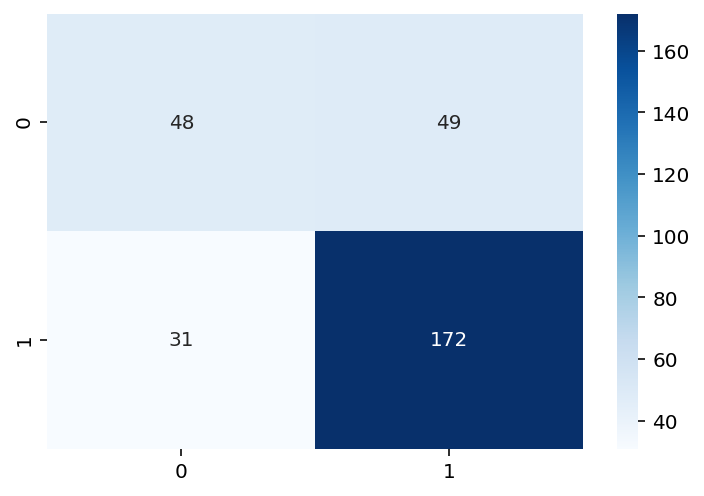

In [28]:
import seaborn as sns

# 혼동행렬 시각화
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

- 실제 신용도가 높은 고객을 신용도가 높다고 예측한 비율이 가장 높다.
- 신용도가 높을 것으로 예측한 고객 중에서 실제로 신용도가 높은 비율도 높다.
- 반면, 실제 신용도가 낮은 고객은 신용도가 낮을 것으로 예측한 비율이 낮다.

**2) accuracy_score**

- accuracy_score로 로지스틱 회귀 모델의 성능 확인

In [29]:
# 불러오기
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.7333333333333333


- 해당 모델의 정확도가 0.73이다.

In [30]:
# 성능 정보 수집
from sklearn.metrics import accuracy_score

score={}

# 성능 정보 수집
score['LogisticRegression'] = accuracy_score(y_test, y_pred)

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘을 사용해 모델링을 진행합니다.

In [31]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
# 선언하기
model = DecisionTreeClassifier(random_state=2022)

In [33]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [34]:
# 예측하기
y_pred = model.predict(x_test)

In [35]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 45  52]
 [ 57 146]]
              precision    recall  f1-score   support

           0       0.44      0.46      0.45        97
           1       0.74      0.72      0.73       203

    accuracy                           0.64       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.64      0.64      0.64       300



- 의사결정트리의 정확도는 0.64
- 신용도가 낮은 고객들의 재현율이 0.46로 낮다.
- 신용도가 높은 고객들의 경우 정밀도, 재현율 모두 신용도가 낮은 고객들에 비해 높은 편

### 4.2.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) confusion matrix**

- heatmap으로 혼동행렬 시각화

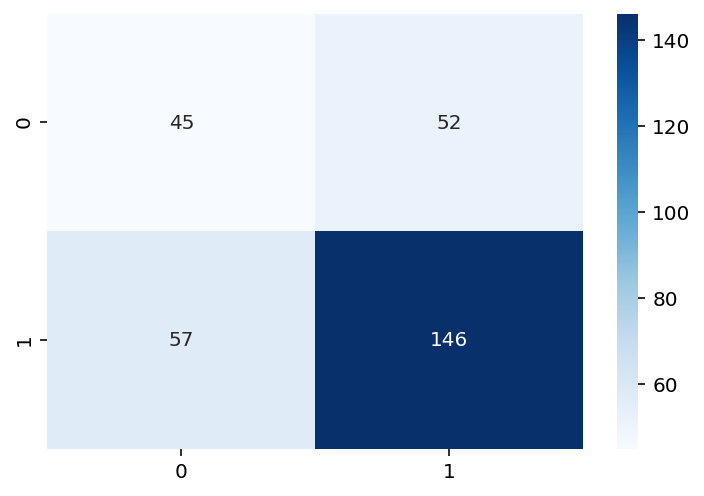

In [36]:
# 혼동행렬 시각화
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

- 실제 신용도가 높은 고객을 신용도가 높다고 예측한 비율이 가장 높다.
- 반면, 신용도가 낮은 고객은 재현율도 정밀도도 약 50%로 모두 낮다.

**2) 변수 중요도**

- 모델의 변수들(Features) 중요도를 확인

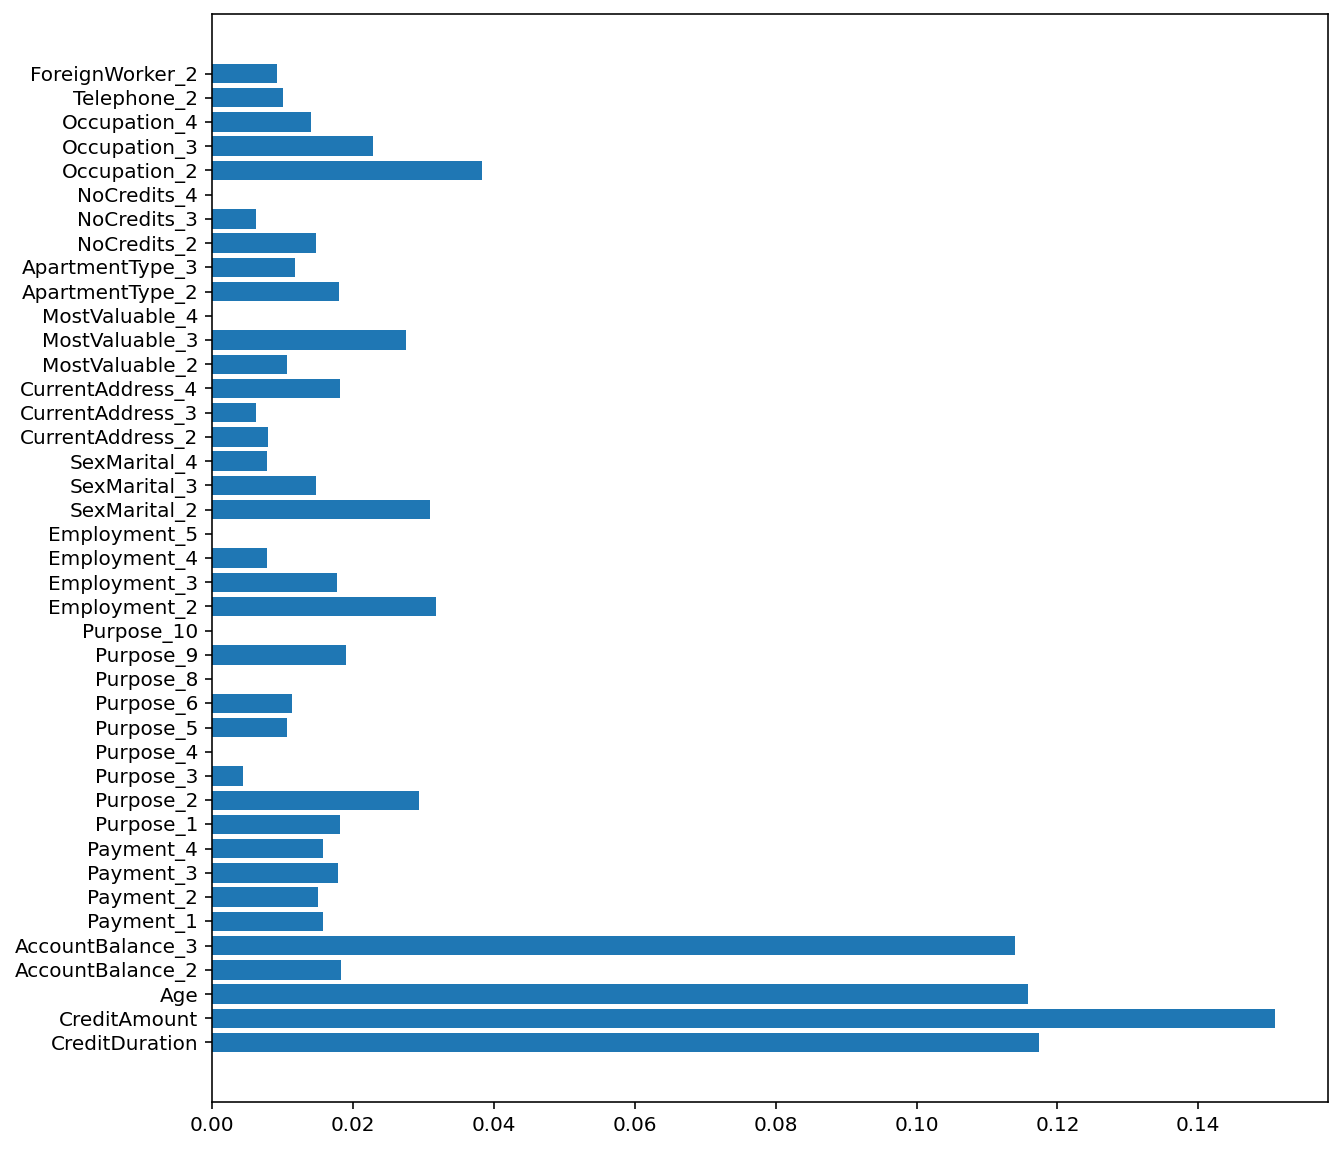

In [37]:
# 중요도 시각화
plt.figure(figsize=(10, 10))
plt.barh(list(x), model.feature_importances_)
plt.show()

- AccountBalance, Age, CreditAmount, CreditDuration의 중요도가 매우 높다.
- 범주형 변수들의 중요도는 대체로 낮다.

In [38]:
# 성능 정보 수집
score['Decision Tree'] = accuracy_score(y_test, y_pred)

## 4.3.KNN

### 4.3.1.모델링

- KNN 알고리즘을 사용해 모델링을 진행합니다.

In [39]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [41]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [43]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 31  66]
 [ 30 173]]
              precision    recall  f1-score   support

           0       0.51      0.32      0.39        97
           1       0.72      0.85      0.78       203

    accuracy                           0.68       300
   macro avg       0.62      0.59      0.59       300
weighted avg       0.65      0.68      0.66       300



- KKN의 정확도는 0.68
- 신용도가 낮은 고객들의 재현율이 0.32로 매우 낮다.
- 신용도가 높은 고객들의 경우 정밀도, 재현율 모두 신용도가 낮은 고객들에 비해 높은 편

### 4.3.2.모델 탐색(1가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) confusion matrix**

- heatmap으로 혼동행렬 시각화

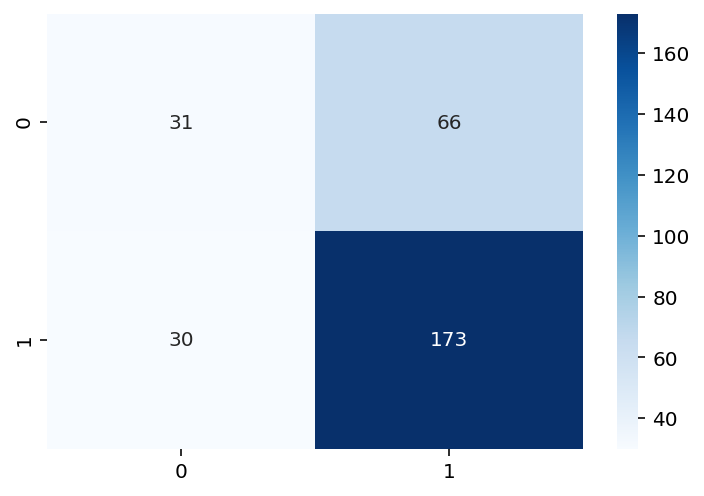

In [44]:
# 혼동행렬 시각화
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

- 실제 신용도가 높은 고객을 신용도가 높다고 예측한 비율이 가장 높다.
- 반면, 신용도가 낮은 고객은 정밀도도 낮지만 재현율이 31 / (31+66)으로 매우 낮다.

In [45]:
# 성능 정보 수집
score['KNN'] = accuracy_score(y_test, y_pred)

## 4.4.Random Forest

### 4.4.1.모델링

- Random Forest 알고리즘을 사용해 모델링을 진행합니다.

In [46]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
# 2단계: 선언하기
model = RandomForestClassifier(random_state=2022)

In [48]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [49]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [50]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 39  58]
 [ 28 175]]
              precision    recall  f1-score   support

           0       0.58      0.40      0.48        97
           1       0.75      0.86      0.80       203

    accuracy                           0.71       300
   macro avg       0.67      0.63      0.64       300
weighted avg       0.70      0.71      0.70       300



- Random Forest의 정확도는 0.71
- 신용도가 낮은 고객들의 재현율이 0.40로 낮다.
- 신용도가 높은 고객들의 경우 정밀도, 재현율 모두 신용도가 낮은 고객들에 비해 높은 편

### 4.4.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) confusion matrix**

- heatmap으로 혼동행렬 시각화

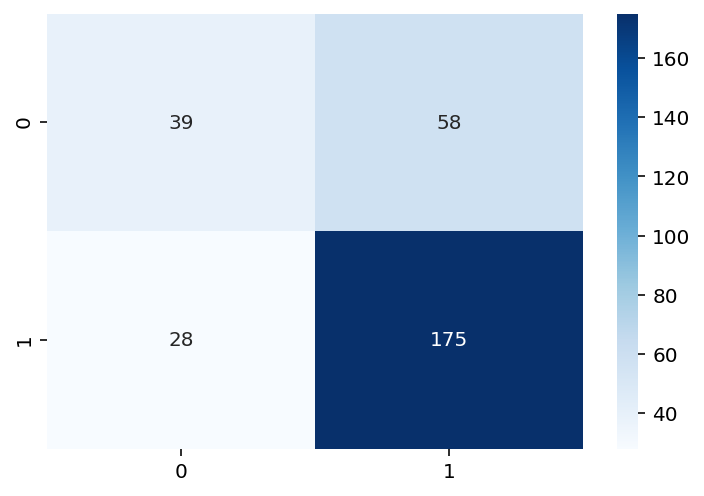

In [51]:
# 혼동행렬 시각화
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

- 실제 신용도가 높은 고객을 신용도가 높다고 예측한 비율이 가장 높다.
- 반면, 신용도가 낮은 고객은 재현율도 정밀도도 모두 낮다.

**2) 변수 중요도**

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

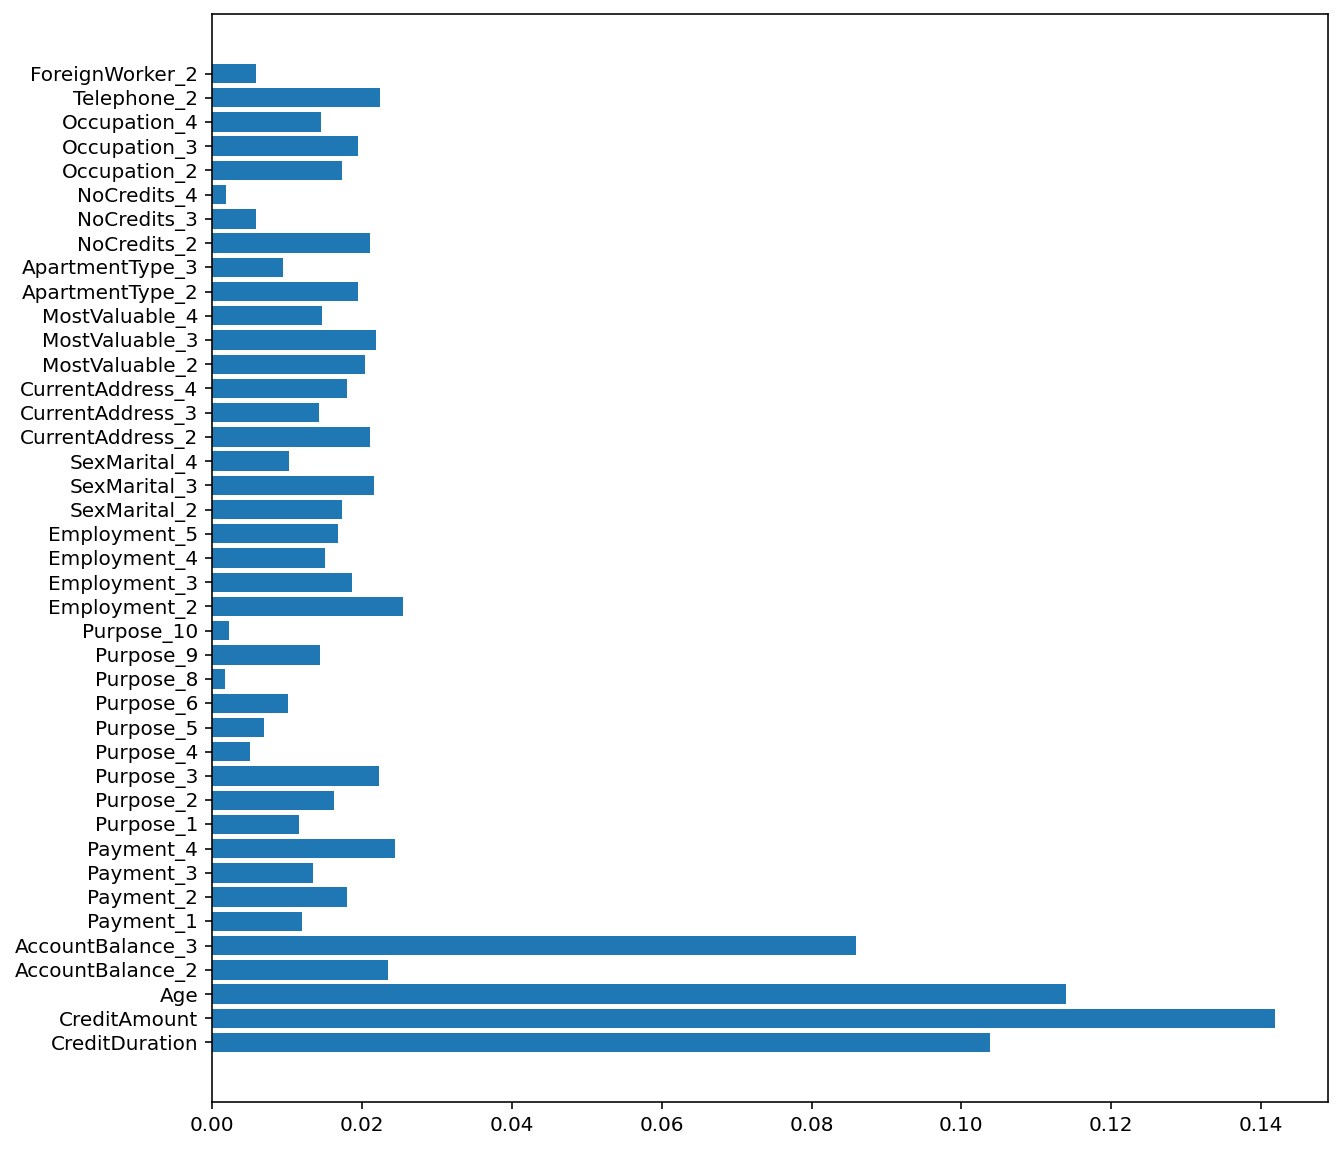

In [52]:
# 중요도 시각화
plt.figure(figsize=(10, 10))
plt.barh(list(x), model.feature_importances_)
plt.show()

- AccountBalance, Age, CreditAmount, CreditDuration의 중요도가 매우 높다.
- 범주형 변수들의 중요도는 대체로 낮다.

In [53]:
# 성능 정보 수집
score['Random Forest'] = accuracy_score(y_test, y_pred)

## 4.5.XGBoost

### 4.5.1.모델링

- XGBoost 알고리즘을 사용해 모델링을 진행합니다.

In [54]:
# 1단계: 불러오기
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
# 2단계: 선언하기
model = XGBClassifier(random_state=2022)

In [56]:
# 3단계: 학습하기
model.fit(x_train, y_train)

[11:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [58]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 52  45]
 [ 42 161]]
              precision    recall  f1-score   support

           0       0.55      0.54      0.54        97
           1       0.78      0.79      0.79       203

    accuracy                           0.71       300
   macro avg       0.67      0.66      0.67       300
weighted avg       0.71      0.71      0.71       300



- XGBoost의 정확도는 0.71
- 신용도가 낮은 고객들의 재현율이 0.54로 낮다.
- 신용도가 높은 고객들의 경우 정밀도, 재현율 모두 신용도가 낮은 고객들에 비해 높은 편

### 4.5.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) confusion matrix**

- heatmap으로 혼동행렬 시각화

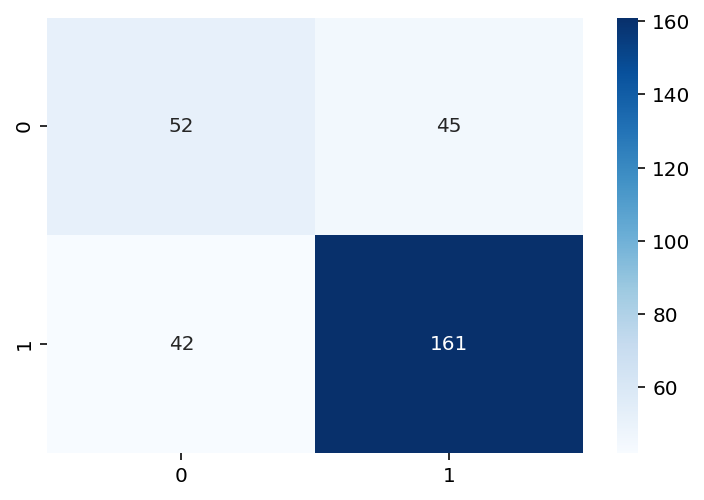

In [59]:
# 혼동행렬 시각화
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

- 실제 신용도가 높은 고객을 신용도가 높다고 예측한 비율이 가장 높다.
- 반면, 신용도가 낮은 고객은 재현율도 정밀도도 약 50%로 모두 낮다.

**2) 변수 중요도**

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

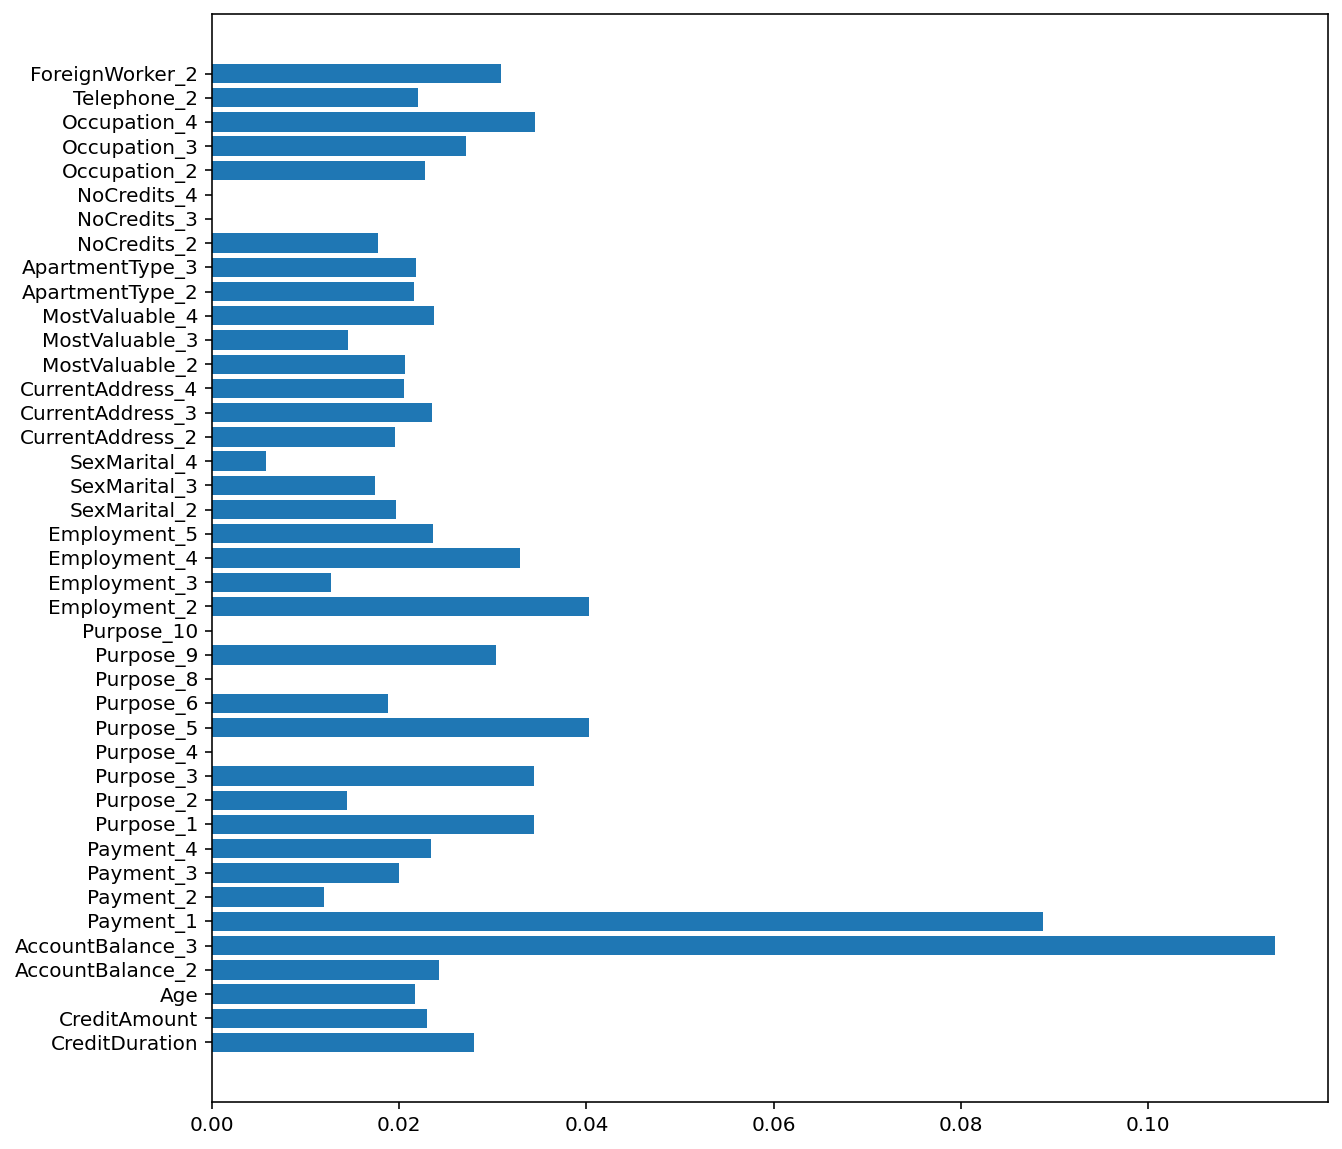

In [60]:
# 중요도 시각화
plt.figure(figsize=(10, 10))
plt.barh(list(x), model.feature_importances_)
plt.show()

- AccountBalance, Payment의 중요도가 가장 두드러진다.
- 나머지 변수들의 중요도는 대체로 비슷하다.

In [61]:
# 성능 정보 수집
score['XGBoost'] = accuracy_score(y_test, y_pred)

# 5.모델 성능 비교 및 정리

- Accuracy Score로 성능을 비교해보면 Logistic Regression이 0.73으로 가장 뛰어남
- 반면, Decision Tree의 정확도는 0.64로 가장 낮음
- 앙상블 알고리즘들도 정확도가 0.71로 Logistic Regression 보다 소폭 낮음

-LogisticRegression: 0.7333
-Decision Tree: 0.6367
-KNN: 0.6800
-Random Forest: 0.7133
-XGBoost: 0.7100


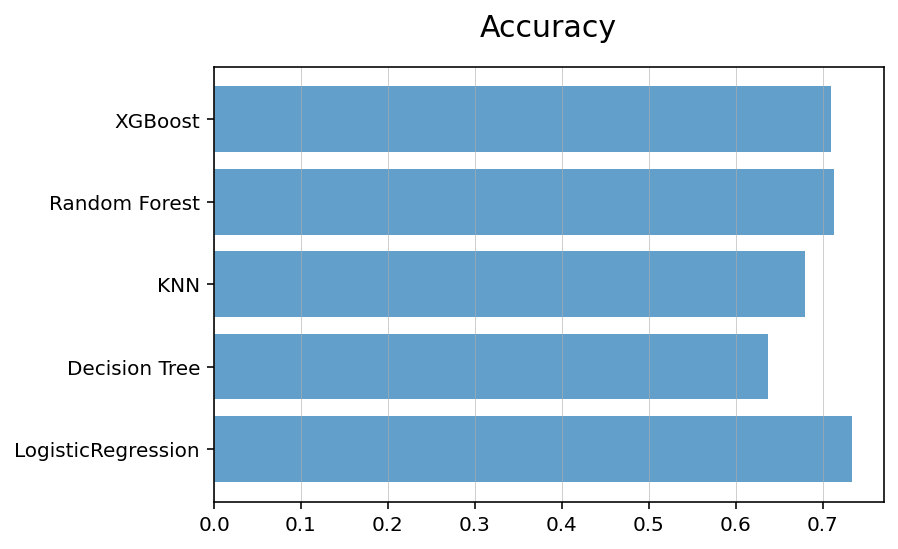

In [62]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시각화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

# 6.성능 튜닝(1개 이상)

- 특정 알고리즘의 모델을 튜닝 대상으로 정하고 나름의 방법으로 모델 성능을 높여봅니다.

## 6.1.Decision Tree튜닝

### 6.1.1.튜닝

In [63]:
# 파라미터 선언
param = {'max_depth': range(1, 51),
            'random_state': range(1, 101)}
grid_param = {'max_depth': [2, 3, 4],
            'random_state': [52, 53, 54, 55, 56, 57, 58]}

In [64]:
# 불러오기
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [65]:
# 선언하기
model_dt = DecisionTreeClassifier()

# Random Search 선언
# model = RandomizedSearchCV(model_rf,
#                           param,
#                           cv=10,
#                           n_iter=30,
#                           n_jobs=-1)

# Grid Search 선언
model = GridSearchCV(model_dt,
                     grid_param,
                     cv=10,
                     n_jobs=-1)

In [66]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'random_state': [52, 53, 54, 55, 56, 57, 58]})

In [67]:
# 결과 확인
print('-' * 50)
print('best_param: ', model.best_params_)
print('best_score: ', model.best_score_)
print('-' * 50)

--------------------------------------------------
best_param:  {'max_depth': 3, 'random_state': 53}
best_score:  0.7285714285714285
--------------------------------------------------


In [68]:
# 예측하기
y_pred = model.predict(x_test)

In [69]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 49  48]
 [ 37 166]]
              precision    recall  f1-score   support

           0       0.57      0.51      0.54        97
           1       0.78      0.82      0.80       203

    accuracy                           0.72       300
   macro avg       0.67      0.66      0.67       300
weighted avg       0.71      0.72      0.71       300



### 6.1.2.튜닝 결과

- 의사결정트리의 정확도가 튜닝 전후 0.64 -> 0.72로 개선되었다.
- 신용도가 낮은 고객들의 정밀도가 튜닝 전후 0.44 -> 0.57로 개선되었다.
- 신용도가 낮은 고객들의 재현율이 튜닝 전후 0.46 -> 0.51로 개선되었다.